# Part 1: Modelling

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample
sns.set()

### Loading Data

- Loading field names from field_names.txt file
- Loading raw data from 'breast-cancer.csv file and attaching field names to it. 

In [2]:
with open('field_names.txt') as file:
    field_names = list(map(lambda x: x.strip(), file.readlines()))

Loading raw data and removing ID column because ID will infer nothing. It is unique for every patient

In [3]:
data = pd.read_csv('breast-cancer.csv', names = field_names, header = None)
data.drop('ID', axis = 1, inplace = True)

In [4]:
data.loc[data.diagnosis == 'B', 'diagnosis'] = 0
data.loc[data.diagnosis == 'M', 'diagnosis'] = 1

### Data Exploration


Each row have sequence of features (predictor variable) and diagnosis is the prediction class

In [5]:
data.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


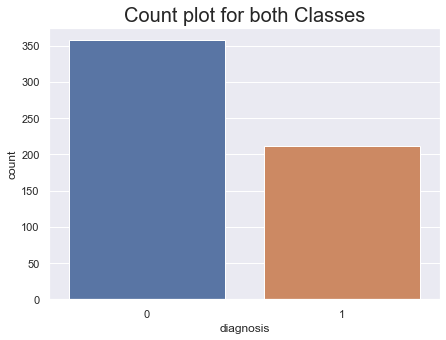

In [6]:
plt.figure(figsize = (7, 5))
ax = sns.countplot(x = 'diagnosis', data = data)
plt.title("Count plot for both Classes", fontdict = {"size": 20});

**Summarizing features**

In [7]:
data.describe()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
benign_data = data[data['diagnosis'] == 0]
malignent_data = data[data.diagnosis == 1]

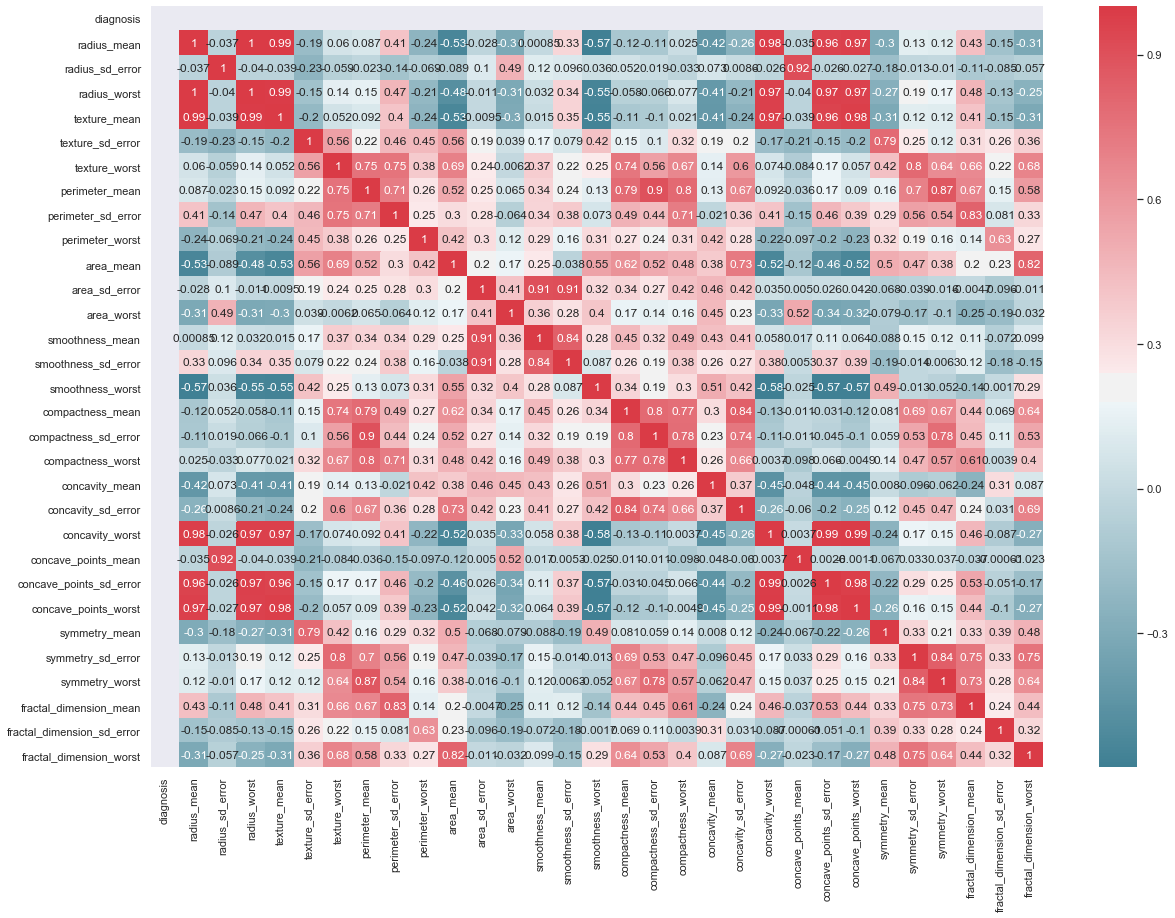

In [9]:
plt.figure(figsize = (20, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(benign_data.corr(), cmap = cmap, annot = True)

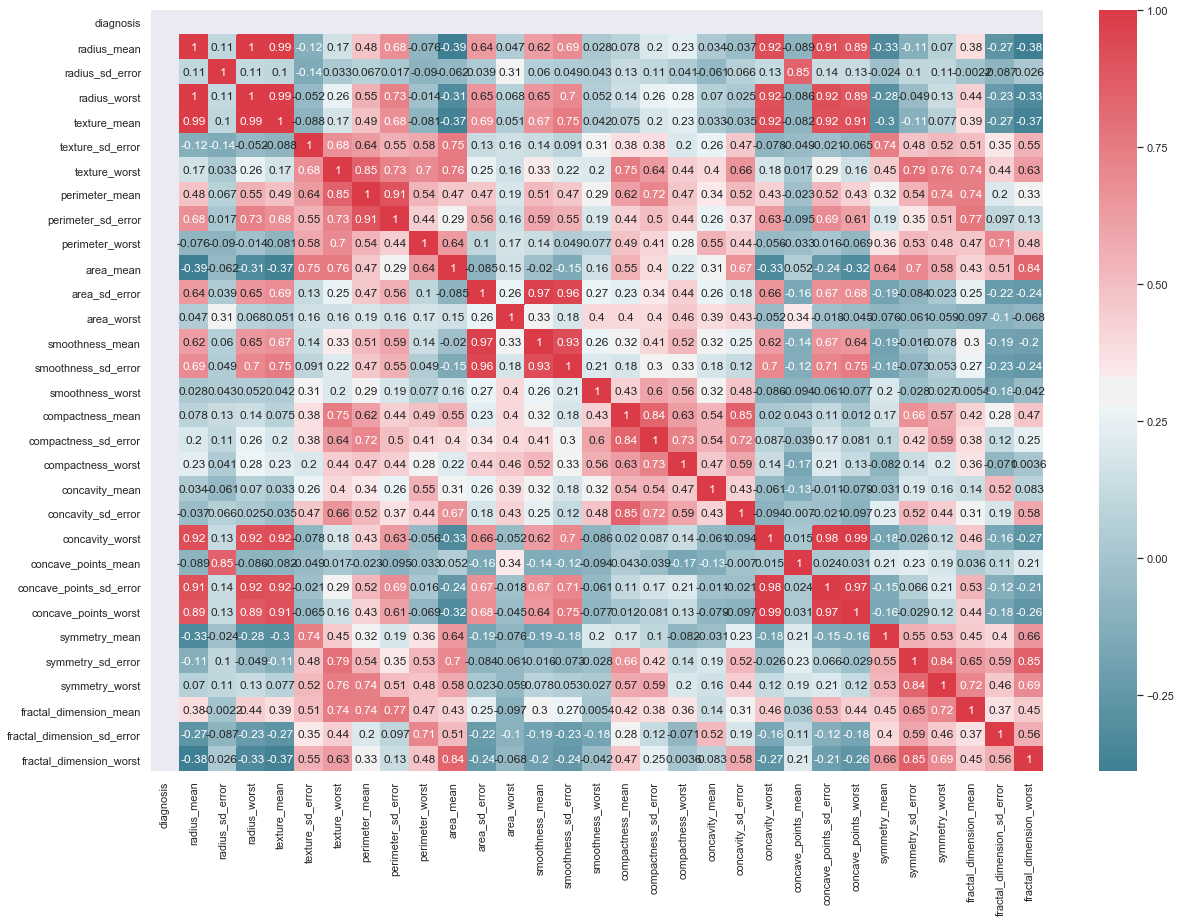

In [10]:
plt.figure(figsize = (20, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(malignent_data.corr(), cmap = cmap, annot = True)

**Mean and Median Analysis**

**Mean Smoothing**

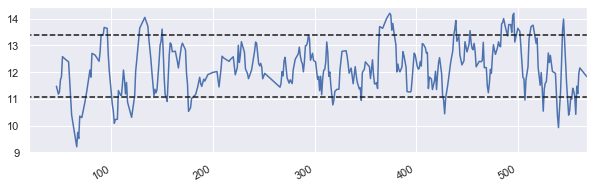

In [29]:
ax = benign_data.rolling(5).mean().radius_mean.plot(subplots = True, figsize = (10, 3));
plt.plot([0, data.shape[0]], [benign_data.radius_mean.quantile(0.75), benign_data.radius_mean.quantile(0.75)], 'k--')
plt.plot([0, data.shape[0]], [benign_data.radius_mean.quantile(0.25), benign_data.radius_mean.quantile(0.25)], 'k--')

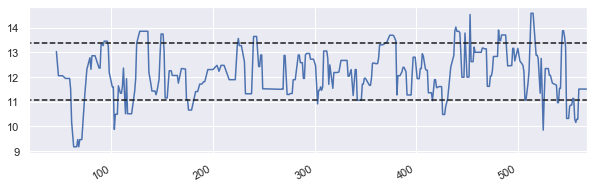

In [30]:
benign_data.rolling(5).median().radius_mean.plot(subplots = True, figsize = (10, 3));
plt.plot([0, data.shape[0]], [benign_data.radius_mean.quantile(0.75), benign_data.radius_mean.quantile(0.75)], 'k--')
plt.plot([0, data.shape[0]], [benign_data.radius_mean.quantile(0.25), benign_data.radius_mean.quantile(0.25)], 'k--');

- Mean smoothing, the values have drastic change which means very high variance in data over row intervals. 
- Median smoothing, the values don't have drastic change over row interval. 

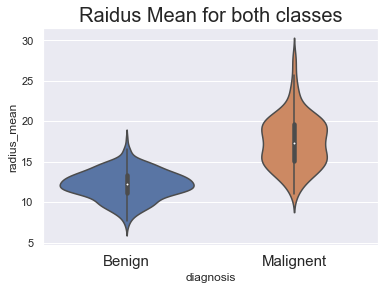

In [45]:
ax = sns.violinplot(x = 'diagnosis', data = data, y = 'radius_mean')
ax.set_xticklabels(['Benign', 'Malignent'], fontsize = 15);
ax.set_title("Raidus Mean for both classes", fontsize = 20);

- Radius mean of the Benign tumor is low and Malignent have a high value. 
- As we can see distribution for Benign tumor having a very low variance than Malignent tumor. 
- Benign distribution has a spread which fits with Normal Distribution
- Malignent tumor has spread is more like a skewed binomial distribution. 

#### Creating correlation matrix for finding the strong and week correlation between the parameters. 

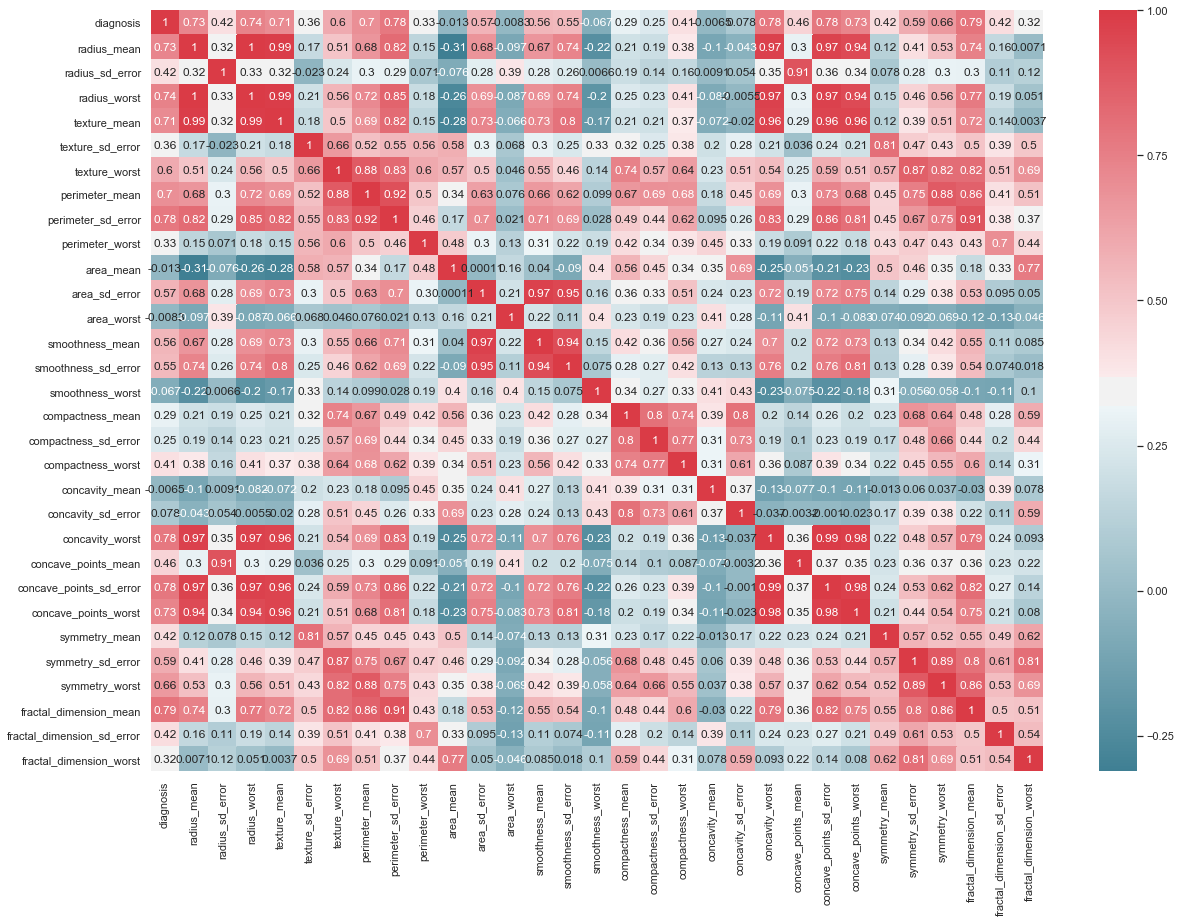

In [10]:
plt.figure(figsize = (20, 14))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(data.corr(), cmap = cmap, annot = True)

Through the above correlation matrix, We are selecting features which are strongly correlated

As we can see 
- radius_mean, radius_worst have a correlation value of 1. Which mean strong positive correlation.  
- radius_mean, texture_mean have a correlation value of 0.99. Which mean very high positive correlation

So, selecting only these features

In [33]:
features = ['radius_mean', 'radius_worst', 'texture_mean']

In [34]:
train_x = data[features]
train_y = data['diagnosis']

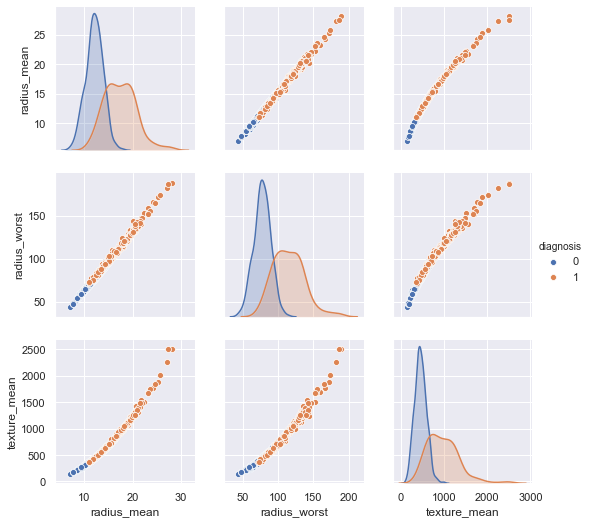

In [35]:
sns.pairplot(data, hue = 'diagnosis', vars = features)

In the pairplot we can see that selected feature seperate both classes in a linear way
- There is an positive relationship between the features. As radius_worst increase radius_mean also increase. 

### Data Transformation

Normalization is a technique of data preparation. Here, we take all the features with different measures to a common measure. It also help in learning features very fast. Because if the feature value range is high then there is a large auxiliary space to move the gredient. Which will slow down the learning.

In [54]:
transform_x = MinMaxScaler().fit_transform(train_x)

# Converting numpy array to pandas Dataframe
transform_x = pd.DataFrame(transform_x, columns = features)
transform_x

,radius_mean,radius_worst,texture_mean
0,0.521037,0.545989,0.363733
1,0.643144,0.615783,0.501591
2,0.601496,0.595743,0.449417
3,0.210090,0.233501,0.102906
4,0.629893,0.630986,0.489290
...,...,...,...
564,0.690000,0.678668,0.566490
565,0.622320,0.604036,0.474019
566,0.455251,0.445788,0.303118
567,0.644564,0.665538,0.475716


### Modeling 

- After selecting the features we need to create the model. 

In this excercise, I am using simple models. 

**Logistic Regression**: Logistic regression is a discriminative classification model which uses the logit function to make prediction.<br> 
Logit function is: $$P(X) = \frac{1}{1+ e^{\theta^{T}X}}$$

I am using Logistic Regression because selected features are having a linear relationship. And Logistic Regression is robust with linear model.

**Decision Tree**: Decision tree is a rule-based approach for classification. It find patterns or rules from the data on the basis of some learning matrix like cross entropy, information gain.
I am using Decision tree because as we can see the data is linearly seperatable, then there is some hidden rules defined which will help in increasing the accuracy.


**Comparision**
- **Logistic Regression** always fits a single line to divide the auxillary space into two parts. It always create a linear decision boundary. Creating a single line means very less chance of overfitting.Training a logistic regression will be time efficient. **Decision Tree** cut down the data into small regions. It will narrow-down the data score which can leads to overfitting. It takes so much time beceause find patterns. 
- Logistic Regression is simple to interpret because have a very few features but if we create a large noded decision tree, it will be difficult to interpret the model. Because at every level we have different set of rules. 
- Logisitic Regression can be generalized because of few parameters. Decision tree is not generalized because it determine very specific patterns from the dataset.

In [49]:
## Helper function
def bootstrap_sampling(clf, x, y, n_sample = 10, n_bootstrap = 10):
    score = 0
    for i in range(n_bootstrap):
        sample_x, sample_y = resample(x, y, n_samples = n_sample)
        score += clf.score(sample_x, sample_y)
    return score / n_bootstrap

**Logistic Regression**

- Creating logistic regression without regularization will give got a chance of overfitting.
- Creating model with L2 regularization. 

In [74]:
clf = LogisticRegression(penalty = 'none')

clf.fit(transform_x, train_y)

accuracy = bootstrap_sampling(clf, transform_x, train_y, n_sample = 50, n_bootstrap = 100)
print ("Logistic Regression have accuracy: {:.4f}".format(accuracy))

Logistic Regression have accuracy: 0.9074


In [75]:
clf = LogisticRegression(penalty = 'l2')

clf.fit(transform_x, train_y)

accuracy = bootstrap_sampling(clf, transform_x, train_y, n_sample = 50, n_bootstrap = 100)
print ("Logistic Regression have accuracy: {:.4f}".format(accuracy))

Logistic Regression have accuracy: 0.8898


**Decision Tree**
- Decision tree have no explicit regularization parameter because Decision trees are follows rule based approach. 
- For regularization we need to give max_depth 

In [98]:
tree = DecisionTreeClassifier()

tree.fit(transform_x, train_y)

accuracy = bootstrap_sampling(tree, transform_x, train_y, n_sample = 50, n_bootstrap = 100)
print ("Decision tree have accuracy: {:.4f}".format(accuracy))

print (f"Decision tree without fixed max_depth: {tree.tree_.max_depth}")

Decision tree have accuracy: 1.0000
Decision tree without fixed max_depth: 16


In [92]:
tree = DecisionTreeClassifier(max_depth = 5)

tree.fit(transform_x, train_y)

accuracy = bootstrap_sampling(tree, transform_x, train_y, n_sample = 50, n_bootstrap = 100)
print ("Decision tree have accuracy: {:.4f}".format(accuracy))
print(f"Decision tree with fixed max_depth: {tree.tree_.max_depth}")

Decision tree have accuracy: 0.9390
Decision tree with fixed max_depth: 5


### Explanation

**Technical Audience**

- In this notebook, I performed eploratory analysis specially bivariate analysis, Using bivariate analysis, I was able to select features with very strong correlation, which can combinally use to classify Benign Tumors from Malignent one's. Dataset is highly unbalanced which means, model could be bias to one class. <br>
- In the further process, we can do univariate and multi-variate analysis to check whether only one feature could be capable to predict values with high accuracy. It could improve the model performance. <br>
- I used correlation matrix for feature selection, we can also use random forest or any other techique to select best features from the feature space. 
- I trained model on fixed feature space, we can analyse the feature space and manipulate the feature space.

**Non-Technical Audience**

- In this notebook, i did analysis on Breast cancer data, and tried to create model using statistical and rule-based techniques. These models will try to predict type of breast cancer using some measures of breast cancer.
- For prediction of category of breast cancer i used Logistic Regression and Decision tree model. Where Logistic Regression is a statistical model which uses line equation to create a seperation line between two features. On the other hand, I used decision tree which will use basic rules like human take decision. For e.g. When we go for shopping and found something we always take a decision whether to purchase or not. Decision trees uses similar approach to classify breast cancer. In both models, Decision tree give a better accuracy because it found the pattern from raw data. But Logisitic Regression also gave a good accuracy but if we use more features then it will improve performance. 
- In my analysis, i found that 3 parameters (radius_mean, radius_worst and texture_mean) will give a good accuracy. Even logically that is proven because when we see any wound with human eyes, we always find seriousness of wound by seeing the area covered, depth and texture. 

# Part 2: Feedback

## Student Sample 1

In [1]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
# Error while importing "https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html"
# from sklearn import LinearRegression 
from sklearn.linear_model import LinearRegression ## LinearRegressiong available in linear_model package

# Error -- cross_validation package deperciated. 
# Read documentation "https://scikit-learn.org/stable/modules/cross_validation.html"
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score ## function is available in model_selection

# Load data
# Tip -- d could be ambiguous variable. Use more informative variable names
# for e.g. you are loading data for training purpose use -- train_data, data
# d = pd.read_csv('part-2-data.train.csv')
data = pd.read_csv('part-2-data.train.csv')

# Setup data for prediction
# Error -- Use of undefined variable. Load data in 'd' variable and using 'data' for processing. 
# Tip -- Use informative variable names for distinguishing prediction variable (dependent variable) from predictor variables (independent variable)
# For predictor variable use `x`, `train_x`. For predictor variables use `train_y`, `target`.
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()


# Evaluate model
# Error cross_validation package is depreciated. 
# Read documentation "https://scikit-learn.org/stable/modules/cross_validation.html"
# Not import cross_val_score because already imported in eariler stage
# from sklearn.cross_validation import cross_val_score
# from sklearn.cross_validation import train_test_split # This is not required.

# Error in scoring metrice is not available. Check in the link
# https://scikit-learn.org/stable/modules/model_evaluation.html
# cv parameters is n_splits of k-fold validation. It can't be 1
# scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
scores = cross_val_score(model, x2, x1, cv = 10, scoring = 'neg_median_absolute_error')
print(scores.mean())

-9122.03164604559


## Tips

### Programming Tips
- Remove all unneccessary libraries to make your code lighter
- Use very infromative and self-explanatory variable for future reference. 
- Try to import all libraries at one place.
- Write comments for critical coding portions. (For future reference)
- Use print statements after every critical step 

### Methodological Tips
- Create some data visualization.
- Always start with basic analysis of the data like Mean analysis, Median analysis etc. Then take small steps towards Adavance Analysis. 
- Use Statistical analysis to get variable like understand prediction variable dependence on which parameters like Correlation matrix


### Conceptual Tips

- Statistical analysis give understanding about data and help in tuning your parameters. 
- Take a better understanding about scoring metrices. 
- Try to understand internal process of the Linear Model. 
- Check the independent variable, in current scenerio, ContractType (Independent Variable) has more than 60% NULL values, which means we are inferring nothing from 60% of data. 


## Student Sample 2

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
# Error -- cross_validation package deperciated. 
# Read documentation "https://scikit-learn.org/stable/modules/cross_validation.html"
# from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score

# Load data
data = pd.read_csv('part-2-data.train.csv')


# Setup data for prediction
# Tip -- Use informative variable names for distinguishing prediction variable (dependent variable) from predictor variables (independent variable)
# For predictor variable use `x`, `train_x`. For predictor variables use `train_y`, `target`.
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)



# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(scores.mean())

-11822.140231295069


## Tips

### Programming Tips
- Remove all unneccessary libraries to make your code lighter
- Use very infromative and self-explanatory variable for future reference. 
- Python is case-sensitive language. Choose variable names accordingly.
- Write comments for critical coding portions and steps you performed
- Use print statements after every critical step 

### Methodological Tips
- Create visualization for better understanding of data. 
- Use data normalization technique to normalize the values. 
- Always start with basic analysis of the data like Mean analysis, Median analysis etc. Then take small steps towards Adavance Analysis. 

### Conceptual Tips
- Try to understand black-box process of the Linear Model. 
- Use Statistical analysis to get variable like understand prediction variable dependence on which parameters like correlation Matrix 
- Check the independent variable, in current scenerio, ContractType (Independent Variable) has more than 60% NULL values, which means we are inferring nothing from 60% of data. 